# Genetic Algorithm for solving Sudoku

In [ ]:
!pip install pygame
!pip install pyfiglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 80.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 865 kB 4.1 MB/s 


PyGame Dependencies


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import pyfiglet
import matplotlib.pyplot as plt

Implementing Sudoku Board Drawing as a GUI

In [ ]:
# set SDL to use the dummy NULL video driver, 
# Fool system to think it has a video access
os.environ["SDL_VIDEODRIVER"] = "dummy"

import pygame

pygame.init()

# Set size of game and other constants
cell_size = 50
minor_grid_size = 1
major_grid_size = 3
buffer = 5
button_height = 50
button_width = 125
button_border = 2
width = cell_size * 9 + minor_grid_size * 6 + major_grid_size * 4 + buffer * 2
height = cell_size * 9 + minor_grid_size * 6 + \
         major_grid_size * 4 + button_height + buffer * 3 + button_border * 2
size = width, height
white = 255, 255, 255
black = 0, 0, 0
gray = 200, 200, 200
green = 0, 175, 0
red = 200, 0, 0
inactive_btn = 51, 255, 255
active_btn = 51, 153, 255

screen = pygame.display.set_mode(size)
pygame.display.set_caption('Sudoku')


'''
  A class built upon the pygame Rect class used to represent individual cells in the game.
  This class has a few extra attributes not contained within the base Rect class.
'''
class RectCell(pygame.Rect):

    def __init__(self, left, top, row, col):
        super().__init__(left, top, cell_size, cell_size)
        self.row = row
        self.col = col

'''Creates all 81 cells with RectCell class.'''
def create_cells():
    cells = [[] for _ in range(9)]

    # Set attributes for first RectCell
    row = 0
    col = 0
    left = buffer + major_grid_size
    top = buffer + major_grid_size

    while row < 9:
        while col < 9:
            cells[row].append(RectCell(left, top, row, col))

            # Update attributes for next RectCell
            left += cell_size + minor_grid_size
            if col != 0 and (col + 1) % 3 == 0:
                left = left + major_grid_size - minor_grid_size
            col += 1

        # Update attributes for next RectCell
        top += cell_size + minor_grid_size
        if row != 0 and (row + 1) % 3 == 0:
            top = top + major_grid_size - minor_grid_size
        left = buffer + major_grid_size
        col = 0
        row += 1

    return cells

'''Draws the major and minor grid lines for Sudoku.'''
def draw_grid():
    # Draw minor grid lines
    lines_drawn = 0
    pos = buffer + major_grid_size + cell_size
    while lines_drawn < 6:
        pygame.draw.line(screen, black, (pos, buffer),
                         (pos, width - buffer - 1), minor_grid_size)
        pygame.draw.line(screen, black, (buffer, pos),
                         (width - buffer - 1, pos), minor_grid_size)

        # Update number of lines drawn
        lines_drawn += 1

        # Update pos for next lines
        pos += cell_size + minor_grid_size
        if lines_drawn % 2 == 0:
            pos += cell_size + major_grid_size

    # Draw major grid lines
    for pos in range(buffer + major_grid_size // 2, width, cell_size * 3 + minor_grid_size * 2 + major_grid_size):
        pygame.draw.line(screen, black, (pos, buffer),
                         (pos, width - buffer - 1), major_grid_size)
        pygame.draw.line(screen, black, (buffer, pos),
                         (width - buffer - 1, pos), major_grid_size)


'''Fills in all the numbers for the game.'''
def fill_cells(all_cells, sudoku_board):
    font = pygame.font.Font(None, 36)

    # Fill in all cells with correct value
    for row in range(9):
        for col in range(9):
            if sudoku_board[row][col] is None:
                continue

            # Fill in given values
            font.bold = True
            if(sudoku_board[row][col] == 0):
              text = font.render(' ', 1, black)
            else:
              text = font.render(f'{sudoku_board[row][col]}', 1, black)

            # Center text in cell
            xpos, ypos = all_cells[row][col].center
            textbox = text.get_rect(center=(xpos, ypos))
            screen.blit(text, textbox)


# Draws all elements making up the board.
def draw_board(all_cells, game):
    # Draw grid and cells
    draw_grid()

    # Fill in cell values
    fill_cells(all_cells, game)

'''The utility function called by the main method'''
def create_board_diagram(board):
    cells = create_cells()
    screen.fill(white)
    # Draw board
    draw_board(cells, board)
    # Update screen
    pygame.display.flip()
    #convert image so it can be displayed in OpenCV
    view = pygame.surfarray.array3d(screen)

    #  convert from (width, height, channel) to (height, width, channel)
    view = view.transpose([1, 0, 2])

    #  convert from rgb to bgr
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

    return img_bgr

pygame 2.1.2 (SDL 2.0.16, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
puzzles = {
    "easy": [
        [0,2,3,7,0,9,6,8,0],
        [0,7,0,0,6,0,4,0,3],
        [6,0,0,3,0,4,0,0,0],
        [8,0,7,0,0,0,0,0,6],
        [3,4,2,0,9,0,8,0,0],
        [9,5,0,0,0,7,3,0,0],
        [7,0,5,0,0,2,1,3,8],
        [2,6,0,0,3,0,0,0,7],
        [1,0,0,8,7,0,0,0,9]
    ],
    "medium": [
        [4,3,0,0,0,0,0,2,0],
        [6,0,8,9,0,0,0,0,0],
        [7,0,5,0,6,0,0,0,0],
        [8,7,0,0,0,2,0,0,5],
        [9,0,0,0,4,5,2,7,8],
        [0,4,2,8,0,0,9,6,3],
        [0,5,0,0,3,0,6,0,0],
        [0,0,0,0,2,0,0,0,0],
        [0,0,0,4,0,8,7,0,0]
    ],
    "hard": [
        [1,0,0,0,6,0,0,0,3],
        [0,0,0,0,1,0,0,0,0],
        [0,8,0,0,0,5,1,9,7],
        [0,7,5,0,0,1,0,3,9],
        [0,0,0,0,0,0,0,5,6],
        [8,4,0,0,0,0,0,0,2],
        [5,0,0,0,0,0,0,2,0],
        [4,0,8,0,0,2,6,7,0],
        [7,0,0,4,0,0,0,0,5]
    ],
    "evil": [
        [0,0,3,6,2,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [5,6,0,8,0,0,0,0,0],
        [0,0,6,4,8,0,3,7,0],
        [7,0,0,0,0,0,0,0,0],
        [0,8,9,1,0,0,6,4,0],
        [0,4,0,0,0,0,0,1,0],
        [0,0,0,0,1,0,0,0,0],
        [3,0,0,0,0,8,0,0,0]
    ]
}

In [ ]:
import numpy as np
from numpy.random import randint
import random as rm
import copy
import matplotlib.pyplot as plt

# extracts puzzles by difficulty  
easy = np.array(puzzles['easy'])
medium = np.array(puzzles['medium'])
hard = np.array(puzzles['hard'])
evil = np.array(puzzles['evil'])

class Board:
    def __init__(self, state):
        self.state = copy.deepcopy(state)                       # 2D list of state
        self.fitness = self.get_fitness()
        # self.selection_probability = selection_probability
        self.open_tiles = self.get_open_tiles() # list of open cells [y,x]
        self.grid_open_tiles = self.get_grid_open_tiles() # list of open cells [grid, index in grid]
        self.columns = self.get_columns()        # dict of columns
        self.rows = self.get_rows()              # dict of rows
        self.grids = self.get_grids()            # dict of grids
        self.selection_probability = None

    # gets number of uniques among rows and columns
    def get_fitness(self):
        uniques = 0
        for i in range(9):
            uniques += len(np.unique(self.state[i]))
            uniques += len(np.unique(self.state[:, i]))
        if uniques == 162:
          print(self.state)
        return uniques

    def set_selection_probability(self, fitness_sum):
        selection_probability = self.fitness/fitness_sum
        self.selection_probability = selection_probability

    def get_open_tiles(self):
        open_tiles = []
        for i in range(9):
            for j in range(9):
                if self.state[i][j] == 0:
                    open_tiles.append([i, j])
        return open_tiles
    
    def get_grid_open_tiles(self):
        grid_open_tiles = []
        for open_tile in self.open_tiles:
            # grid key
            i = (int(open_tile[0]/3) * 3) + int(open_tile[1]/3)
            # index within that grid
            j = (open_tile[0] % 3) * 3 + (open_tile[1] % 3)
            grid_open_tiles.append([i, j])
        return grid_open_tiles

    def get_columns(self):
        columns = {}
        for i in range(9):
            column = []
            for j in range(9):
                column.append(self.state[j][i])
            columns[i] = np.array(column)
        return columns

    def get_rows(self):
        rows = {}
        for i in range(9):
            rows[i] = self.state[i]
        return rows

    # new and improved
    def get_grids(self):
      grids = {}
      for i in range(0, 9): 
          grids[i] = [];
      for i in range(0, 9):
        for j in range(0, 9):
          grids[(int(i/3) * 3) + int(j/3)].append(self.state[i][j])
      return grids

    # checks all grids, return false if any duplicates found within
    def check_grids(self, board):
      for grid in board.grids.values():
        seen = []
        for value in grid:
          if value != 0:             # ignores all the blank spaces
            if value not in seen:
              seen.append(value)
            else:
              return False
      return True

    # updates the internal state based off the grid dictionary
    def update_by_grid(self):
      grid_index = 0
      for i in range(9):
          for j in range(9):
                self.state[i][j] = self.grids[int(i/3) * 3 + int(j/3)][(i % 3) * 3 + (j % 3)]
      self.rows = self.get_rows()
      self.columns = self.get_columns()
      self.fitness = self.get_fitness()

    # changed to return a board object instead, made it easier to assess
    # uniqueness amongst grids
    def fill_open_tiles(self):
        filled_board = Board(copy.deepcopy(self.state))
        for i in self.open_tiles:
            filled_board.state[i[0]][i[1]] = randint(1,10)
            filled_board.grids = filled_board.get_grids()
            # check if new value breaks our grid constraint
            # keep rolling dice until it does (smoothe brain approach)
            while(self.check_grids(filled_board) == False):
              filled_board.state[i[0]][i[1]] = randint(1,10)
              filled_board.grids = filled_board.get_grids()
        filled_board.rows = filled_board.get_rows()
        filled_board.columns = filled_board.get_columns()
        return filled_board

    # randomly selects a grid, then randomly swaps two of the grid components
    def mutate(self):
        random_grid = randint(0,9)
        open_cells_indices = [i for i, x in enumerate(self.grid_open_tiles) if x[0] == random_grid]
        open_cells = [self.grid_open_tiles[i][1] for i in open_cells_indices]
        for tile_index in open_cells:
            index1 = np.random.choice(len(open_cells))
            index2 = np.random.choice(len(open_cells))
        while index1 == index2:
            index2 = np.random.choice(len(open_cells))
        hold = self.grids[random_grid][open_cells[index1]]
        self.grids[random_grid][open_cells[index1]] = self.grids[random_grid][open_cells[index2]]
        self.grids[random_grid][open_cells[index2]] = hold
        self.update_by_grid() # updates the internal state, rows, cols

    # creates two children from parents based off random cross over point.
    # cross over is selected in terms of grid.
    # mate should be of type Board()
    # mutation_rate should be suplied as a float with domain of [0,1]
    # returns a tuple containing children (Board(), Board())
    def create_children(self, mate, mutation_rate):
        cross_over = randint(1,8) # narrowed range so that some of each parent is retained in offspring
        #print(f'cross over point = {cross_over}') # print only for debug
        child1 = Board(self.state) # self is top half, mate is bottom half
        child2 = Board(mate.state) # mate is top half, self is bottom half
        # give children lists of open tiles
        child1.open_tiles = self.open_tiles
        child1.grid_open_tiles = self.grid_open_tiles
        child2.open_tiles = self.open_tiles
        child2.grid_open_tiles = self.grid_open_tiles
        i = cross_over
        while i < 9:
            child1.grids[i] = mate.grids[i].copy()
            child2.grids[i] = self.grids[i].copy()
            i += 1
        if rm.random() < mutation_rate:
            child1.mutate() # these also call update_by_grid()
            child2.mutate()
        else:
            child1.update_by_grid()
            child2.update_by_grid()
        return child1, child2

    def print_sudoku(self, puzzle):
        if(puzzle != None):
          img_bgr = create_board_diagram(puzzle)
          #Display image
          cv2_imshow(img_bgr)



class Population:

    def __init__(self, state, size, avg_fitness):
        self.state = copy.deepcopy(state) #copy.deepcopy(state) # list of board objects
        self.size = size
        self.fitness_sum = self.get_fitness_sum()
        self.avg_fitness = self.get_avg_fitness()
        self.set_selection_probability()
        self.selection_probabilities = self.get_selection_probabilities()

    def get_fitness_sum(self):
        fitness_sum = 0
        for i in range(self.size):
            fitness_sum += self.state[i].fitness
        return fitness_sum

    def get_avg_fitness(self):
        return self.fitness_sum / self.size

    def set_selection_probability(self):
        for i in range(self.size):
            self.state[i].set_selection_probability(self.fitness_sum)

    def get_selection_probabilities(self):
        selection_probabilities = []
        for i in range(self.size):
            selection_probabilities.append(self.state[i].selection_probability)
        return selection_probabilities

    def reproduce(self, mutation_rate):
        kids = []

        # trying this with candidates where 1/2 are best fitness, 1/2 are random
        # each set of parents make 2 children
        # all children for next population are made in this function
        candidate_pool = []
        sorted_candidates = copy.deepcopy(self.state)
        sorted_candidates.sort(reverse=True, key=lambda x: x.fitness)
        qtr_index = int(len(self.state)/4)
        best_candidates = sorted_candidates[:qtr_index]
        random_candidates = rm.sample(copy.deepcopy(self.state), qtr_index)
        candidate_pool.extend(best_candidates)
        candidate_pool.extend(random_candidates)
        for i in range(int(self.size/2)):
            parent1 = rm.choice(candidate_pool)
            parent2 = rm.choice(candidate_pool)
            children = parent1.create_children(parent2, mutation_rate)
            kids.append(children[0])
            kids.append(children[1])
        # parents = np.random.choice(self.state, 2, p=self.selection_probabilities, replace=False)
        # p1_fit = parents[0].fitness
        # p2_fit = parents[1].fitness
        # for i in range(x):
        #   children = parents[0].create_children(parents[1], mutation_rate)
        #   kids.append(children[0])
        #   kids.append(children[1])

        #kids.sort(reverse=True, key=lambda x: x.fitness)

        #p1_cond = False
        #p2_cond = False
        # if a parent's fitness value is greater than a child, then retain
        # parent in the new population

        #for kid in kids:
          #if kid.fitness < p1_fit:
            #p1_cond = True
          #elif kid.fitness < p2_fit:
            #p2_cond = True

        #if(p1_cond == True or p2_cond == True):
            #kids.append(parents[0])
            #kids.append(parents[1])

        return kids #[kids[0], kids[i]]

    # checks if there is a winner by evaluating fitness scores of each board
    # is the goal score 162? Should we recalculate fitness?
    def check_solved(self):
      for board in self.state:
        if(board.fitness == 162):
          return board
      return None


class sudoku:
    def __init__(self,board, pop_size, mut_rate, max_gen):
      self.puzzle = Board(board)
      self.pop_size = pop_size
      self.mut_rate = mut_rate
      self.max_gen = max_gen

    def generate_initial_population(self, pop_size):
        start_population_state = []
        for i in range(pop_size):
            filled_puzzle = self.puzzle.fill_open_tiles()
            start_population_state.append(filled_puzzle)
        start_population = Population(start_population_state, self.pop_size, None)
        return start_population

    def run(self):
      population = self.generate_initial_population(self.pop_size)
      winner = population.check_solved()
      fit_avgs = []
      pop_sizes = [self.pop_size]
      i = 0
      winning_gen = 0
      #while(winner != None and i < self.max_gen):
      for i in range(self.max_gen):
        new_pop = []
        while(winner == None and len(new_pop) < self.pop_size):
          print(f'Gen: {i}, Avg Fit: {population.avg_fitness}, Pop size: {self.pop_size}')
          children = population.reproduce(self.mut_rate)
          for kid in children:
            new_pop.append(kid)
          # if len(new_pop) > self.pop_size:
          #   new_pop - 1
          if (len(new_pop) >= self.pop_size):
            population = Population(new_pop, len(new_pop), None)
            pop_sizes.append(population.size)
            self.pop_size = population.size
            fit_avgs.append(population.avg_fitness)
            winner = population.check_solved()
            winning_gen = i
          
      print(f'Final Pop Difference: {pop_sizes[-1] - pop_sizes[0]} ')

      # plotting the points
      plt.plot(fit_avgs, color='green', linestyle='dashed', linewidth=1,
          marker='o', markerfacecolor='blue', markersize=1)

      # setting x and y axis range
      plt.ylim(0, 170)
      plt.xlim(0, len(fit_avgs) - 1)

      # naming the x axis
      plt.xlabel('Generations')
      # naming the y axis
      plt.ylabel('Fitness Averages')

      # giving a title to my graph
      plt.title('Population: ' + str(self.pop_size) + ', Generations: ' + str(winning_gen))

      # function to show the plot
      plt.show()
      return (fit_avgs, winner)

In [ ]:
# level must be a string
def run_ga(level, puzzle, pop_size, mut_rate, max_gen):
  ascii_banner = pyfiglet.figlet_format(level)
  print(ascii_banner)
  img_bgr = create_board_diagram(puzzle)
  cv2_imshow(img_bgr)
  s = sudoku(puzzle, pop_size, mut_rate, max_gen)
  result = s.run()
  ascii_banner = pyfiglet.figlet_format("Solution")
  print(ascii_banner)
  if not result[1] == None:
    img_bgr = create_board_diagram(result[1].state)
    #Display image
    cv2_imshow(img_bgr)
  else:
    print(f'No winner was found :(')



 _                   _ 
| |__   __ _ _ __ __| |
| '_ \ / _` | '__/ _` |
| | | | (_| | | | (_| |
|_| |_|\__,_|_|  \__,_|
                       



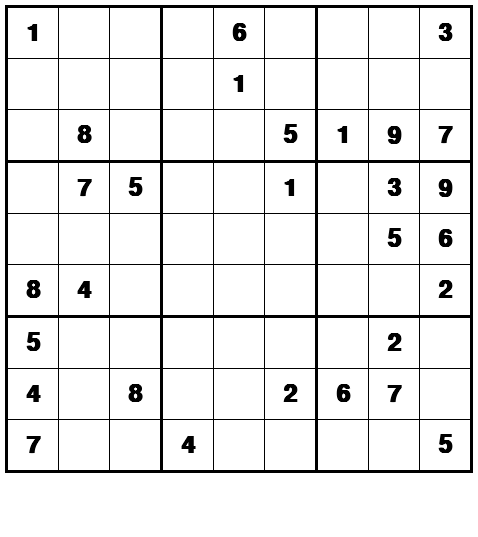

Gen: 0, Avg Fit: 76.0, Pop size: 25000
Gen: 1, Avg Fit: 120.74644, Pop size: 25000
Gen: 2, Avg Fit: 122.92608, Pop size: 25000
Gen: 3, Avg Fit: 124.87844, Pop size: 25000
Gen: 4, Avg Fit: 126.555, Pop size: 25000
Gen: 5, Avg Fit: 128.16652, Pop size: 25000
Gen: 6, Avg Fit: 129.55424, Pop size: 25000
Gen: 7, Avg Fit: 130.84292, Pop size: 25000
Gen: 8, Avg Fit: 132.03168, Pop size: 25000
Gen: 9, Avg Fit: 133.22248, Pop size: 25000
Gen: 10, Avg Fit: 134.26564, Pop size: 25000
Gen: 11, Avg Fit: 135.22364, Pop size: 25000
Gen: 12, Avg Fit: 136.1204, Pop size: 25000
Gen: 13, Avg Fit: 137.02684, Pop size: 25000
Gen: 14, Avg Fit: 137.8832, Pop size: 25000
Gen: 15, Avg Fit: 138.69448, Pop size: 25000
Gen: 16, Avg Fit: 139.45932, Pop size: 25000
Gen: 17, Avg Fit: 140.24248, Pop size: 25000
Gen: 18, Avg Fit: 140.92424, Pop size: 25000
Gen: 19, Avg Fit: 141.63948, Pop size: 25000
Gen: 20, Avg Fit: 142.22012, Pop size: 25000
Gen: 21, Avg Fit: 142.84996, Pop size: 25000
Gen: 22, Avg Fit: 143.52984, 

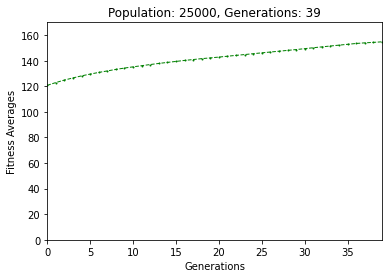

 ____        _       _   _             
/ ___|  ___ | |_   _| |_(_) ___  _ __  
\___ \ / _ \| | | | | __| |/ _ \| '_ \ 
 ___) | (_) | | |_| | |_| | (_) | | | |
|____/ \___/|_|\__,_|\__|_|\___/|_| |_|
                                       



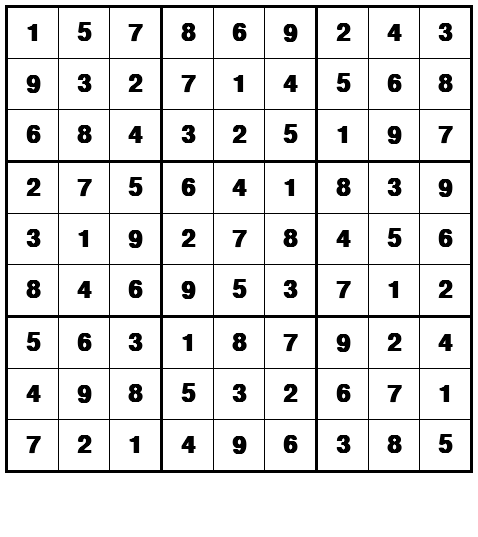

In [ ]:
run_ga("hard", hard, 25000, 0.40, 10000)